## Guide de démarrage 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mpl.__version__

'3.5.2'

### Un exemple

Matplotlib représente graphiquement vos données sur des Figures (par exemple, des fenêtres, des widgets Jupyter, etc.), chacun pouvant contenir un ou plusieurs Axes, une zone où les points peuvent être spécifiés en termes de coordonnées xy (ou theta-r dans un tracé polaire, xyz dans un tracé 3D, etc.). 

La façon la plus simple de créer une figure avec des axes est d'utiliser pyplot.subplots. On peut alors utiliser Axes.plotpour tracer quelques données sur les Axes :

fig, ax = plt.subplots()  # Create a figure

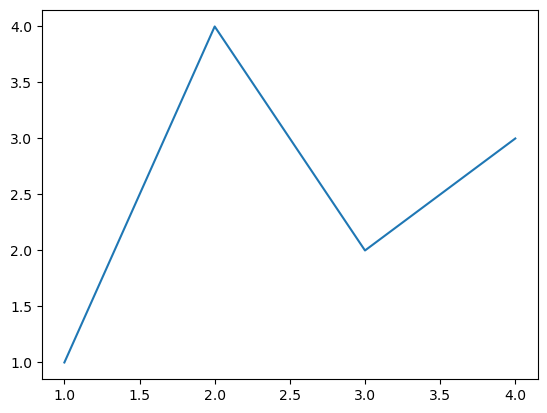

In [3]:
fig, ax = plt.subplots()  
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);

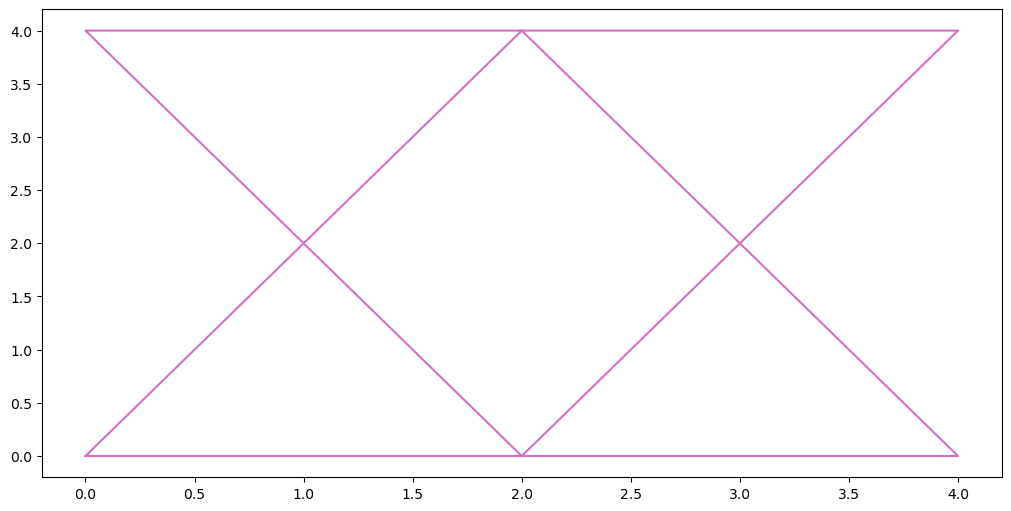

In [4]:
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')  # Create a figure containing a single axes.
ax.plot([0, 4, 2, 0,2,4,0,2], [0, 0, 4, 0,0,4,4,0],color='#b199');  # Plot some data on the axes.

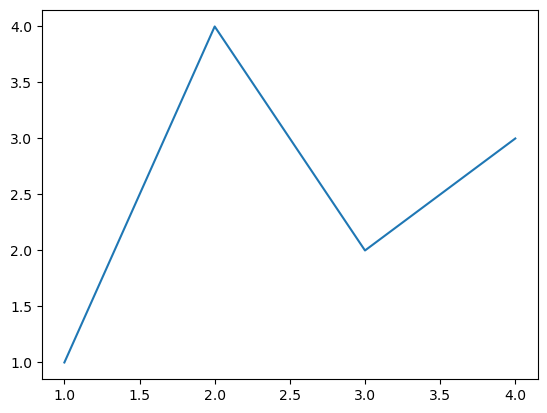

In [5]:
fig, ax = plt.subplots()  
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]) # ;

AttributeError: 'tuple' object has no attribute 'plot'

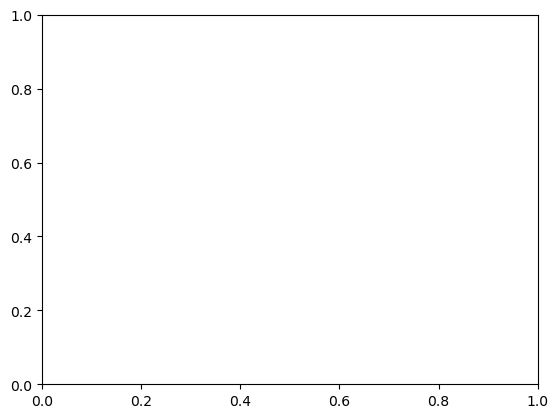

In [6]:
ax = plt.subplots()  
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);

#### Figure
Le chiffre entier . La figure garde une trace de tous les enfants Axes, d'un groupe d'artistes "spéciaux" (titres, légendes des figures, barres de couleurs, etc.) et même de sous-figures imbriquées.

<Figure size 640x480 with 0 Axes>

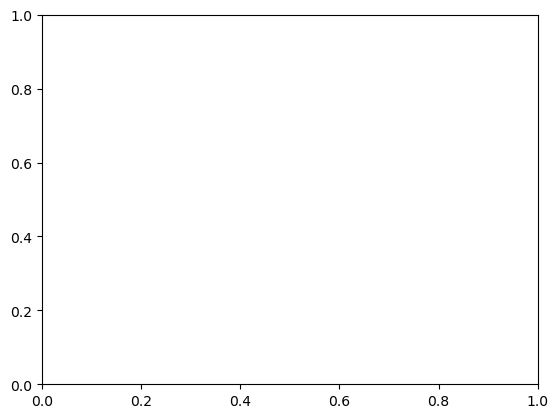

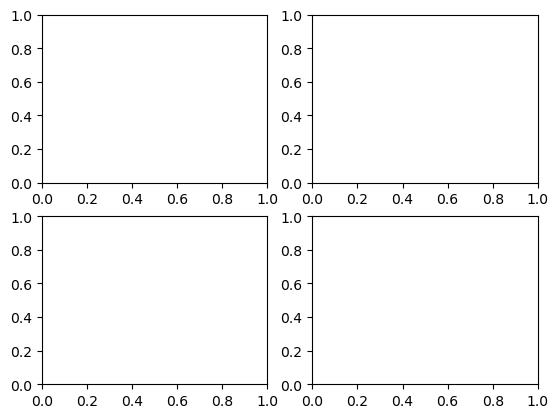

In [7]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

### Types d'entrées aux fonctions de traçage 
Les fonctions de traçage attendent numpy.arrayou numpy.ma.masked_arraycomme entrée, ou des objets qui peuvent être passés à numpy.asarray. Les classes qui sont similaires aux tableaux (« de type tableau ») telles que pandas les objets de données et numpy.matrixpeuvent ne pas fonctionner comme prévu. La convention courante consiste à les convertir en numpy.arrayobjets avant de tracer. Par exemple, pour convertir unnumpy.matrix

In [8]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

In [9]:
b

matrix([[1, 2],
        [3, 4]])

In [10]:
b_asarray

array([[1, 2],
       [3, 4]])

La plupart des méthodes analyseront également un objet adressable comme un dict , un numpy.recarrayou un pandas.DataFrame. Matplotlib vous permet de fournir l' dataargument du mot-clé et de générer des tracés passant les chaînes correspondant aux variables x et y .

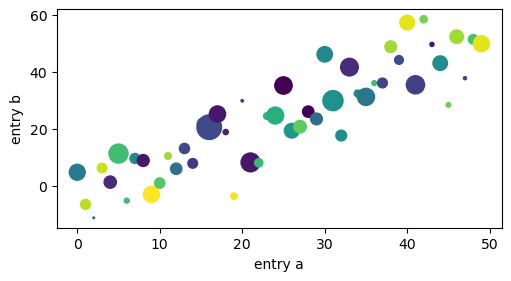

In [11]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5,2.7),layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

### Styles de codage 
#### Les interfaces explicites et implicites 
Comme indiqué ci-dessus, il existe essentiellement deux façons d'utiliser Matplotlib :

Créez explicitement des figures et des axes et appelez des méthodes dessus (le "style orienté objet (OO)").

Comptez sur pyplot pour créer et gérer implicitement les figures et les axes, et utilisez les fonctions pyplot pour le traçage.

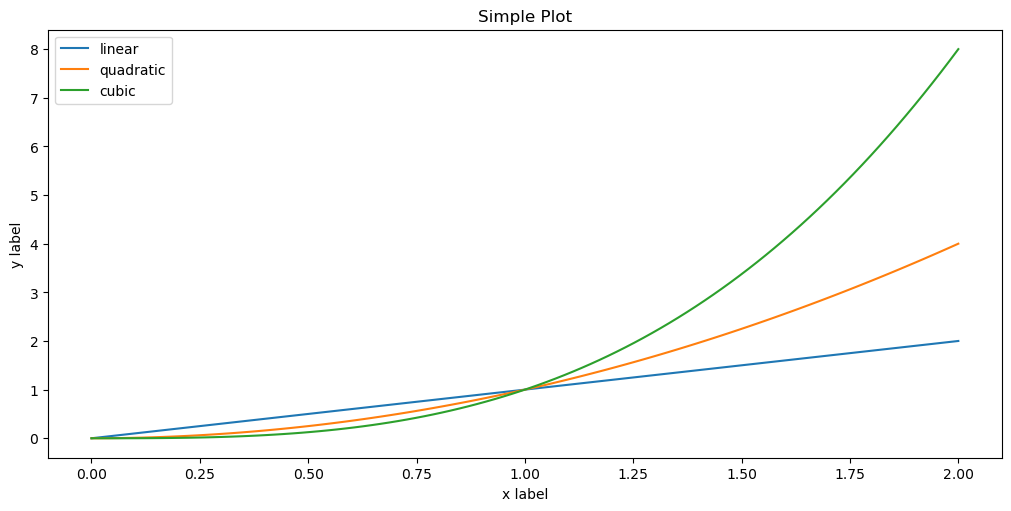

In [12]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

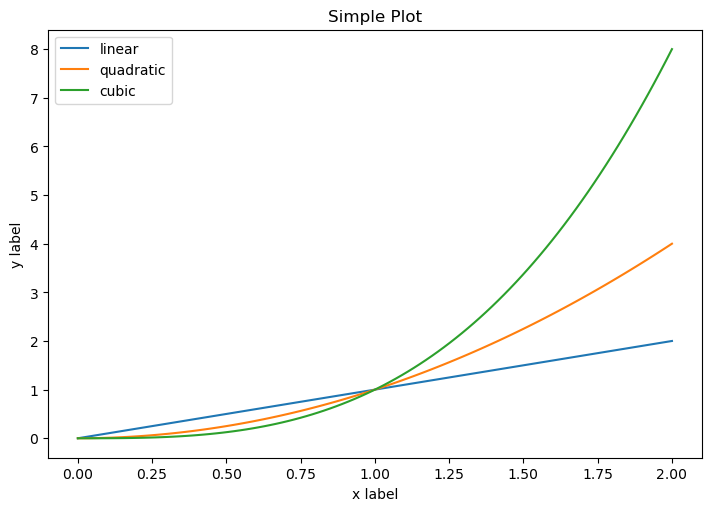

In [13]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(7, 5), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

### Création d'une fonction d'assistance 
Si vous devez créer les mêmes tracés encore et encore avec différents ensembles de données, ou si vous souhaitez envelopper facilement les méthodes Matplotlib, utilisez la fonction de signature recommandée ci-dessous.

In [14]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

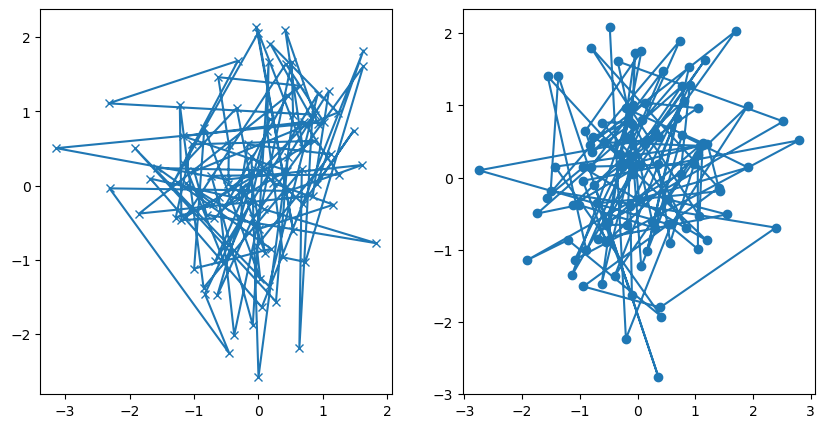

In [15]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

### Artistes stylistes 
La plupart des méthodes de traçage ont des options de style pour les artistes, accessibles soit lorsqu'une méthode de traçage est appelée, soit à partir d'un "setter" sur l'artiste. Dans le tracé ci-dessous, nous définissons manuellement la couleur , la largeur de ligne et le style de ligne des artistes créés par plot, et nous définissons le style de ligne de la deuxième ligne après coup avec set_linestyle.

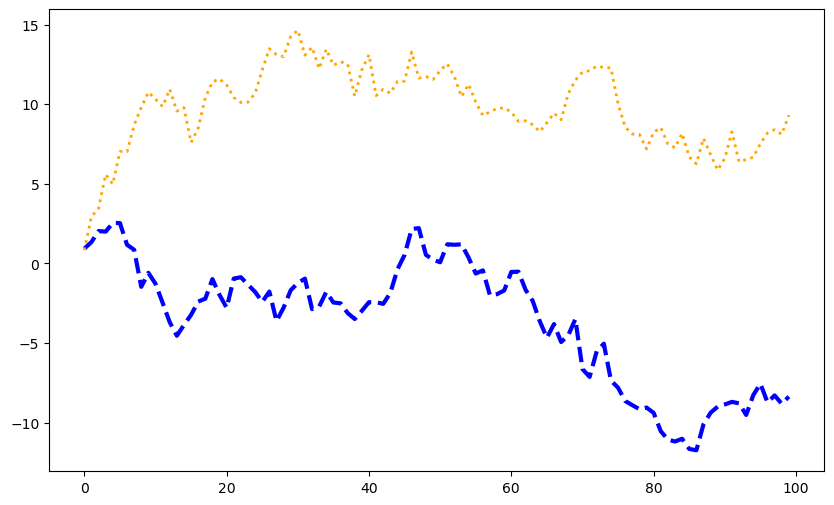

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

### Couleurs 
Matplotlib a une gamme très flexible de couleurs qui sont acceptées pour la plupart des artistes ; voir le tutoriel sur les couleurs pour une liste des spécifications. Certains artistes prendront plusieurs couleurs. c'est à dire pour une scatterparcelle, le bord des marqueurs peut être de couleurs différentes de l'intérieur :

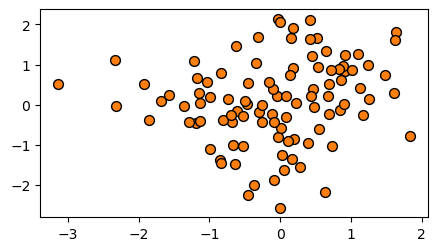

In [17]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C1', edgecolor='k');

### Largeurs de ligne, styles de ligne et tailles de marqueur 
Les largeurs de ligne sont généralement exprimées en points typographiques (1 pt = 1/72 pouce) et disponibles pour les artistes qui ont tracé des lignes. De même, les lignes tracées peuvent avoir un style de ligne. Voir l' exemple de styles de ligne .

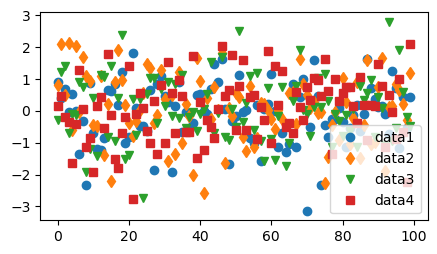

In [18]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

### Étiquetage des parcelles 
#### Étiquettes et texte des axes 
set_xlabel, set_ylabelet set_titlesont utilisés pour ajouter du texte aux emplacements indiqués (voir Texte dans les tracés Matplotlib pour plus de détails). Le texte peut également être directement ajouté aux tracés à l'aide de text:

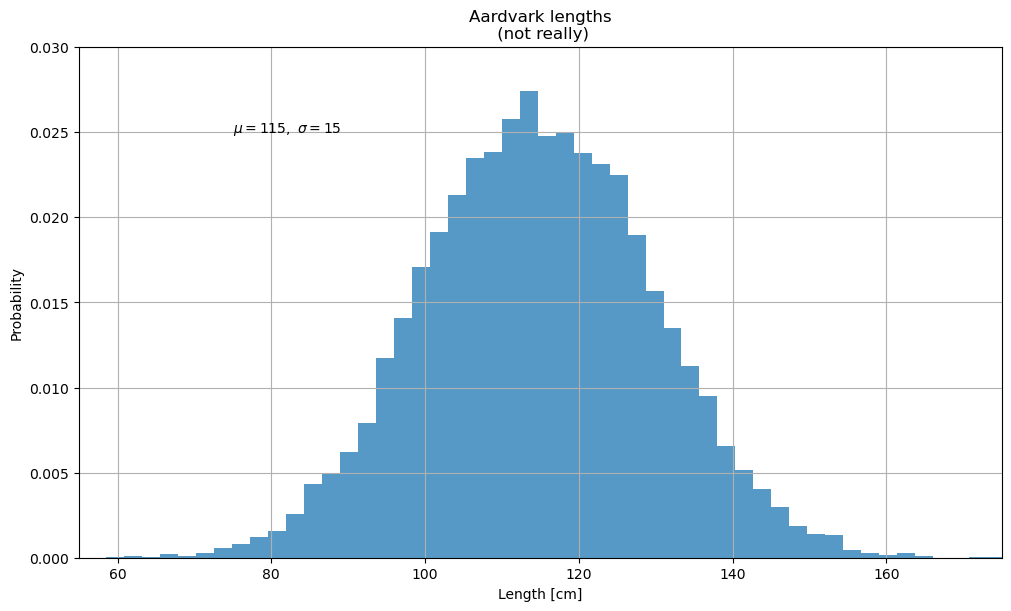

In [19]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
# the histogram of the data
n,bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

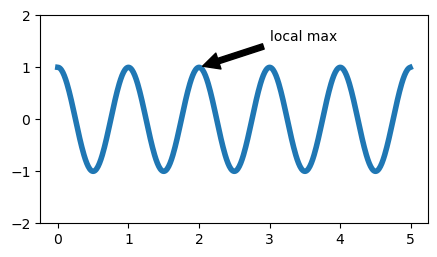

In [20]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=4)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

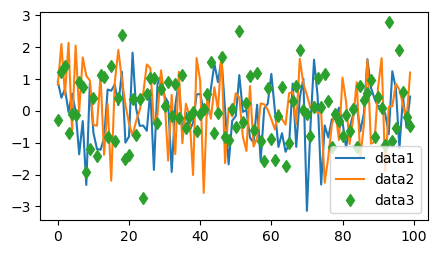

In [21]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

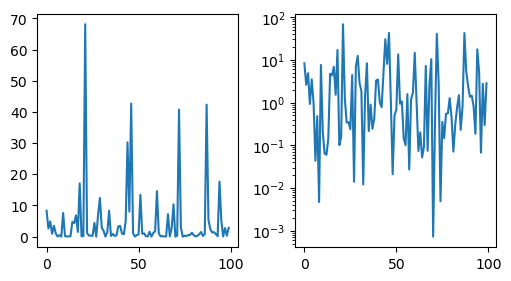

In [22]:
fig, axs = plt.subplots(1,2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data);

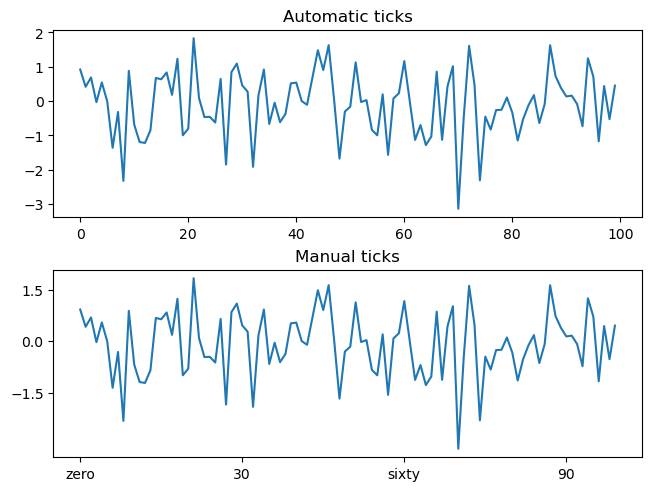

In [23]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks');

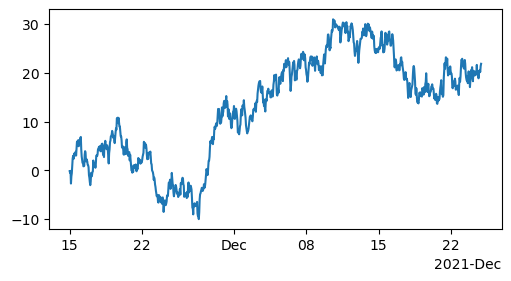

In [24]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);

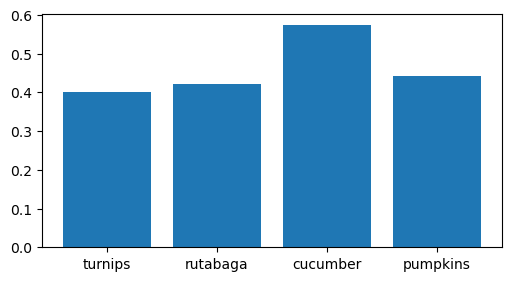

In [25]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)));

Text(0.5, 0, 'Angle [°]')

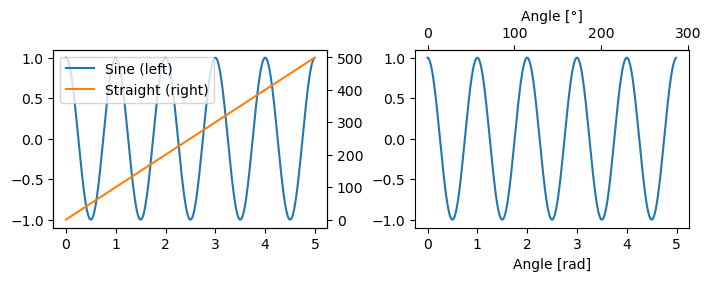

In [26]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

Text(0.5, 1.0, 'scatter()')

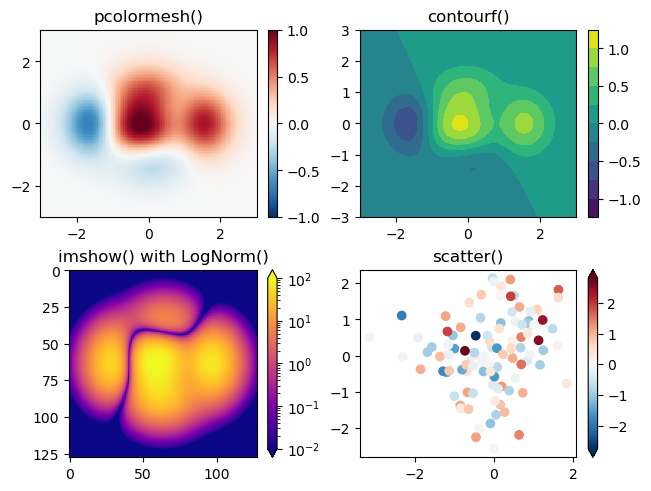

In [27]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

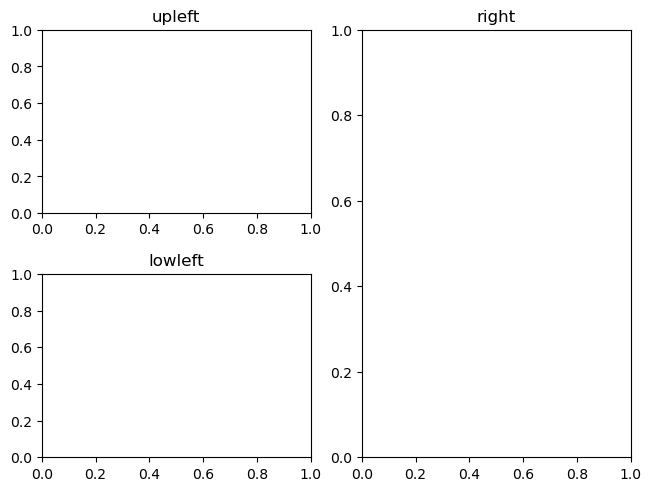

In [28]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right');

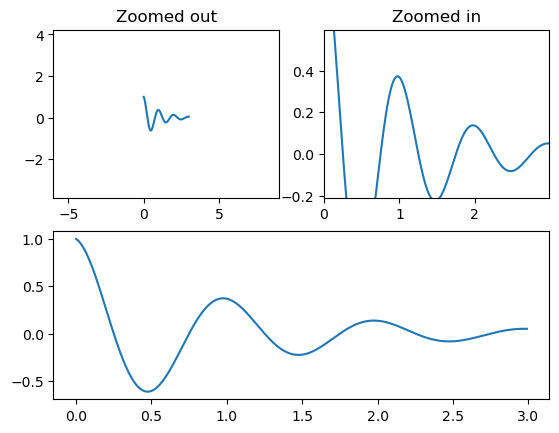

In [29]:
from matplotlib.patches import Polygon


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2,2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

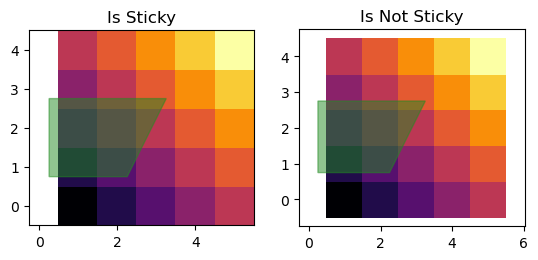

In [30]:
y, x = np.mgrid[:5, 1:6]
poly_coords = [
    (0.25, 2.75), (3.25, 2.75),
    (2.25, 0.75), (0.25, 0.75)
]
fig, (ax1, ax2) = plt.subplots(ncols=2)

# Here we set the stickiness of the axes object...
# ax1 we'll leave as the default, which uses sticky edges
# and we'll turn off stickiness for ax2
ax2.use_sticky_edges = False

for ax, status in zip((ax1, ax2), ('Is', 'Is Not')):
    cells = ax.pcolor(x, y, x+y, cmap='inferno', shading='auto')  # sticky
    ax.add_patch(
        Polygon(poly_coords, color='forestgreen', alpha=0.5)
    )  # not sticky
    ax.margins(x=0.1, y=0.05)
    ax.set_aspect('equal')
    ax.set_title('{} Sticky'.format(status))

plt.show()

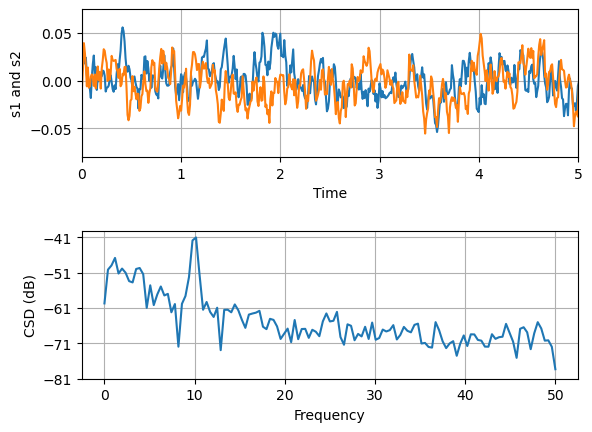

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('Time')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (dB)')
plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

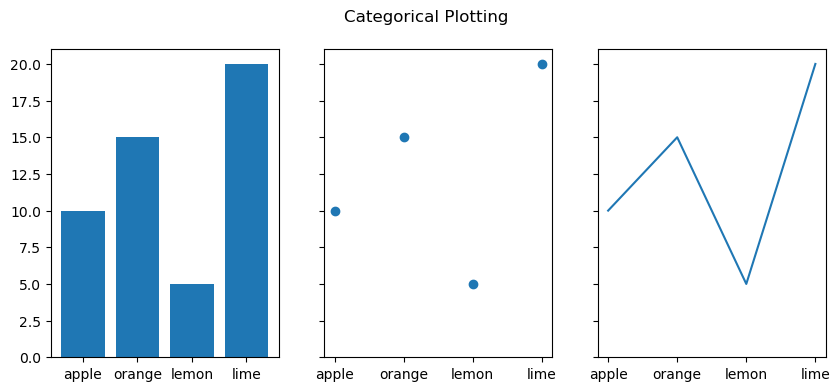

In [32]:
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

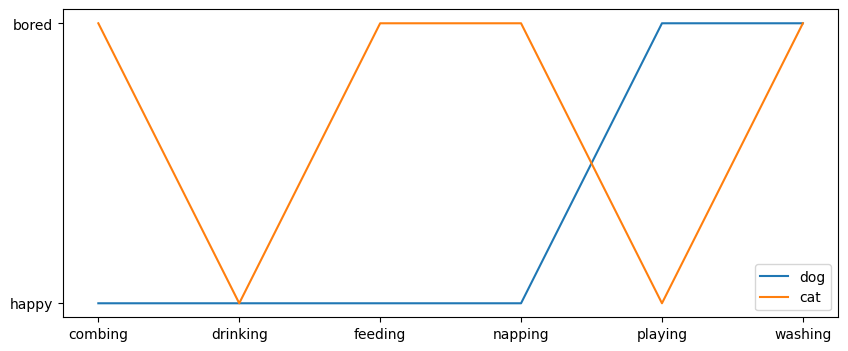

In [33]:
cat = ["bored", "happy", "bored", "bored", "happy", "bored"]
dog = ["happy", "happy", "happy", "happy", "bored", "bored"]
activity = ["combing", "drinking", "feeding", "napping", "playing", "washing"]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(activity, dog, label="dog")
ax.plot(activity, cat, label="cat")
ax.legend()

plt.show()

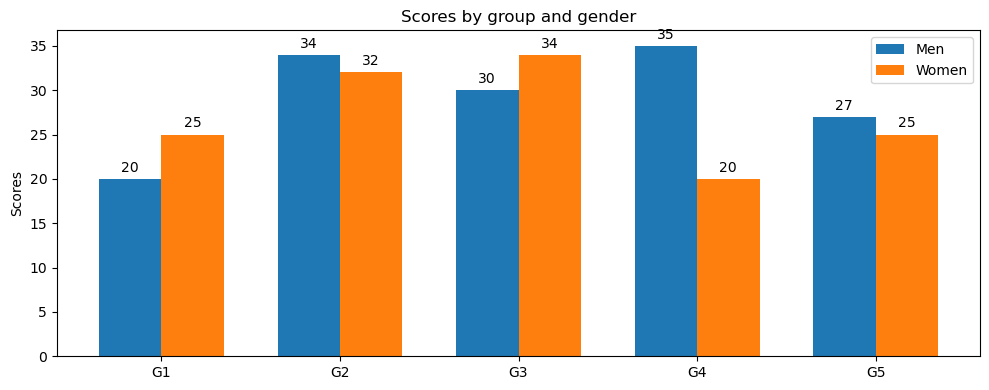

In [34]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 4))
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

NameError: name 'ConnectionPatch' is not defined

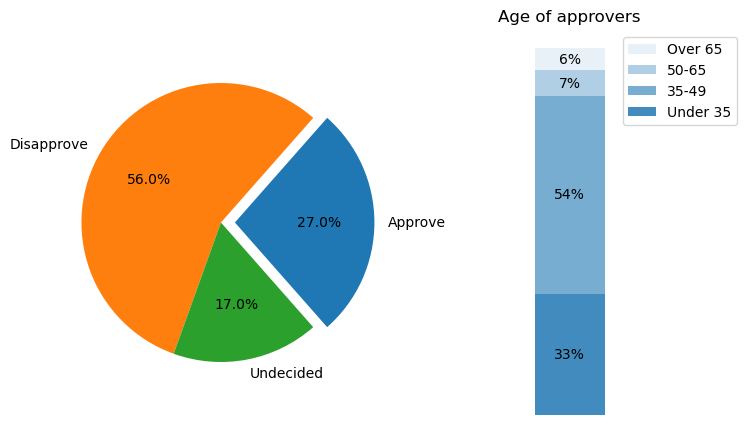

In [35]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.33, .54, .07, .06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age of approvers')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

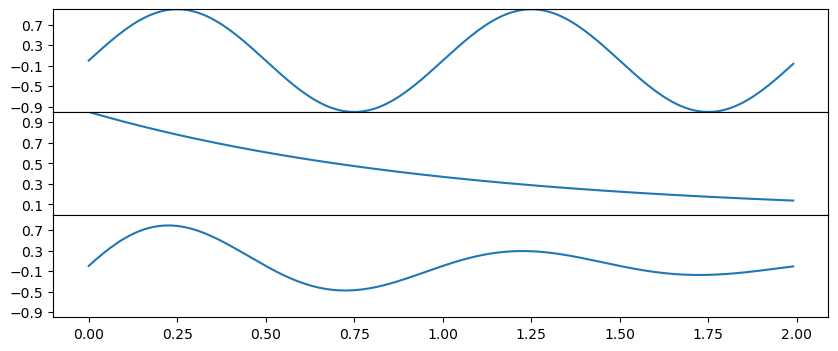

In [36]:
t = np.arange(0.0, 2.0, 0.01)

s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = s1 * s2

fig, axs = plt.subplots(3, 1,figsize=(10, 4), sharex=True)
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[0].set_ylim(-1, 1)

axs[1].plot(t, s2)
axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axs[1].set_ylim(0, 1)

axs[2].plot(t, s3)
axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[2].set_ylim(-1, 1)

plt.show()